In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [52]:
# Read the xlsx file into a pandas dataframe
df = pd.read_excel('3-Data_source.xlsx',usecols= 'A:H',index_col=0)
df

,"Temperature, (F)","Solution Gas Oil Ratio, (SCF/STB)","Gas Specific Gravity, (-)","API, (-)","Oil Specific Gravity, (-)","Oil Formation Volume Factor, (bbl/STB)","Bubble Point Pressure, (Psi)"
Sample No.,,,,,,,
1,120,126.00,1.224,30.029680,0.876000,1.102,350.0
2,150,160.00,1.265,21.142934,0.927000,1.132,560.0
3,220,279.00,1.238,25.547725,0.901000,1.264,998.0
4,165,410.00,1.088,27.488764,0.890000,1.268,1332.0
5,130,469.00,0.970,34.579812,0.852000,1.265,1428.0
...,...,...,...,...,...,...,...
563,200,589.61,0.927,22.910000,0.916391,1.417,2878.0
564,200,599.12,0.917,22.170000,0.920804,1.417,2880.0
565,120,554.00,0.872,25.320000,0.902308,1.272,2393.0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567 entries, 1 to 567
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Temperature, (F)                        567 non-null    int64  
 1   Solution Gas Oil Ratio, (SCF/STB)       567 non-null    float64
 2   Gas Specific Gravity, (-)               567 non-null    float64
 3   API, (-)                                567 non-null    float64
 4   Oil Specific Gravity, (-)               567 non-null    float64
 5   Oil Formation Volume Factor, (bbl/STB)  567 non-null    float64
 6   Bubble Point Pressure, (Psi)            567 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 35.4 KB


In [54]:
df.describe(include='all')

,"Temperature, (F)","Solution Gas Oil Ratio, (SCF/STB)","Gas Specific Gravity, (-)","API, (-)","Oil Specific Gravity, (-)","Oil Formation Volume Factor, (bbl/STB)","Bubble Point Pressure, (Psi)"
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,193.858907,636.920353,1.197618,35.103821,0.850419,1.443833,1931.968254
std,51.994983,405.758670,0.455350,5.999735,0.030614,0.272769,1261.449227
min,74.000000,26.000000,0.159000,19.400000,0.752660,1.032000,79.000000
25%,160.000000,347.000000,0.891500,30.934148,0.827970,1.272000,865.000000
50%,196.000000,585.000000,1.039000,35.363208,0.848000,1.390200,1758.000000
75%,237.000000,853.000000,1.367000,39.400000,0.871122,1.532100,2958.000000
max,306.000000,2496.000000,3.444500,56.500000,0.937707,2.916000,6741.000000


In [55]:
#to find if any nan values in the data
df.isna().any()

Temperature, (F)                          False
Solution Gas Oil Ratio, (SCF/STB)         False
Gas Specific Gravity, (-)                 False
API, (-)                                  False
Oil Specific Gravity, (-)                 False
Oil Formation Volume Factor, (bbl/STB)    False
Bubble Point Pressure, (Psi)              False
dtype: bool

In [56]:
df[df.isnull().any(axis=1)]

,"Temperature, (F)","Solution Gas Oil Ratio, (SCF/STB)","Gas Specific Gravity, (-)","API, (-)","Oil Specific Gravity, (-)","Oil Formation Volume Factor, (bbl/STB)","Bubble Point Pressure, (Psi)"
Sample No.,,,,,,,


In [57]:
df[df.duplicated()]

,"Temperature, (F)","Solution Gas Oil Ratio, (SCF/STB)","Gas Specific Gravity, (-)","API, (-)","Oil Specific Gravity, (-)","Oil Formation Volume Factor, (bbl/STB)","Bubble Point Pressure, (Psi)"
Sample No.,,,,,,,


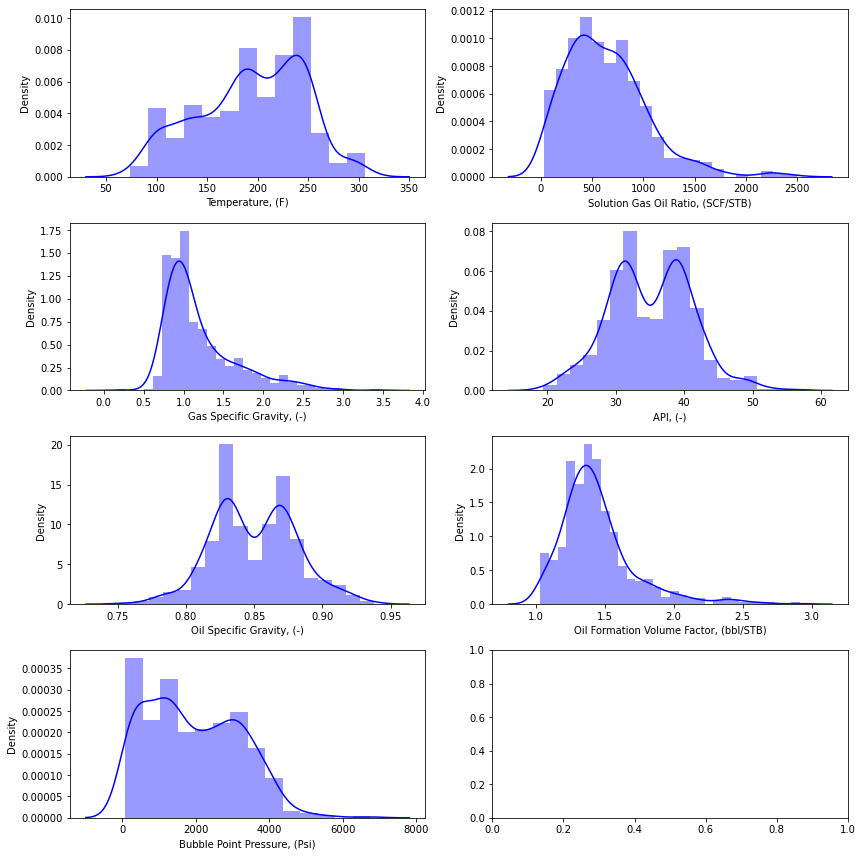

In [58]:
#Plotting distributions of each columns
import matplotlib.pyplot as plt
import seaborn as sns 
fig, axes = plt.subplots(4, 2, figsize=(12, 12))
columns=df.columns
i=0
j=0
for col in columns[:]:
    sns.distplot(df[col] , color="blue", ax=axes[i, j])
    if j==0:
        j=1
    else:
        j=0
        i=i+1   

plt.tight_layout()

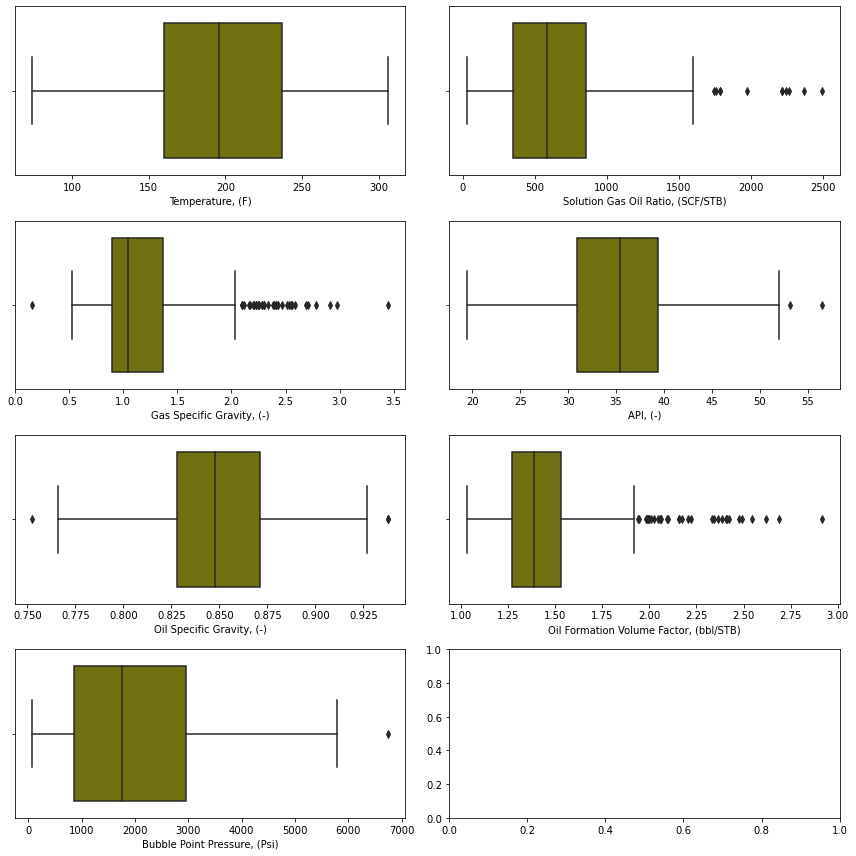

In [59]:
#Plotting distributions of each columns
import matplotlib.pyplot as plt
import seaborn as sns 
fig, axes = plt.subplots(4, 2, figsize=(12, 12))
columns=df.columns
i=0
j=0
for col in columns[:]:
    sns.boxplot(df[col] , color="olive", ax=axes[i, j])
    if j==0:
        j=1
    else:
        j=0
        i=i+1   

plt.tight_layout()

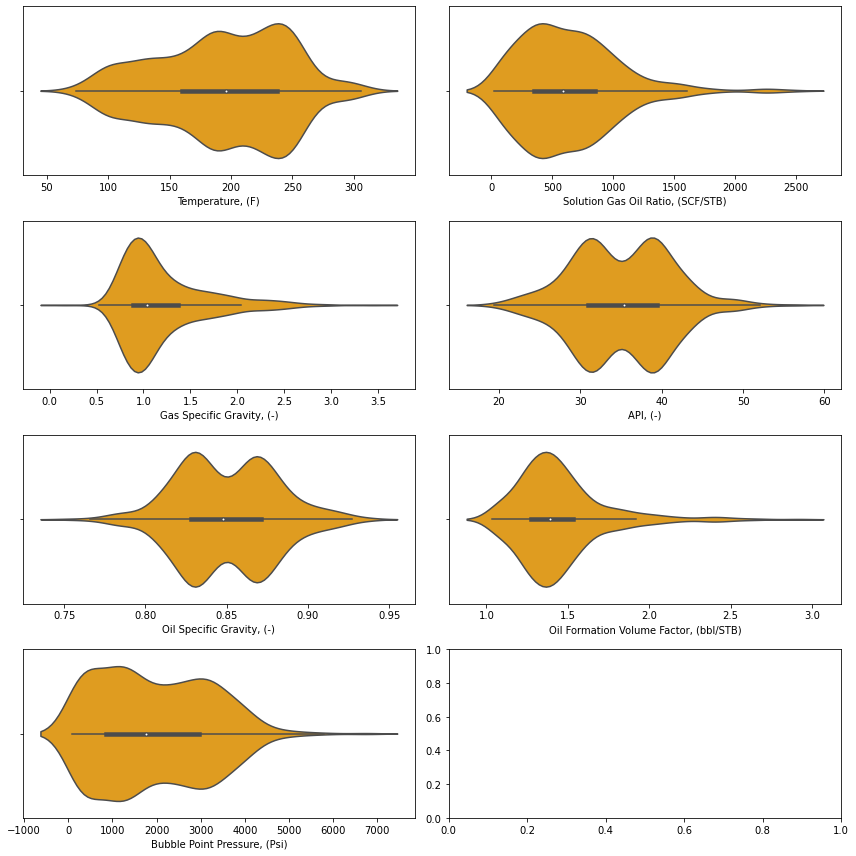

In [60]:
#Plotting distributions of each columns
import matplotlib.pyplot as plt
import seaborn as sns 
fig, axes = plt.subplots(4, 2, figsize=(12, 12))
columns=df.columns
i=0
j=0
for col in columns[:]:
    sns.violinplot(df[col] , color="orange", ax=axes[i, j])
    if j==0:
        j=1
    else:
        j=0
        i=i+1   

plt.tight_layout()

<AxesSubplot:>

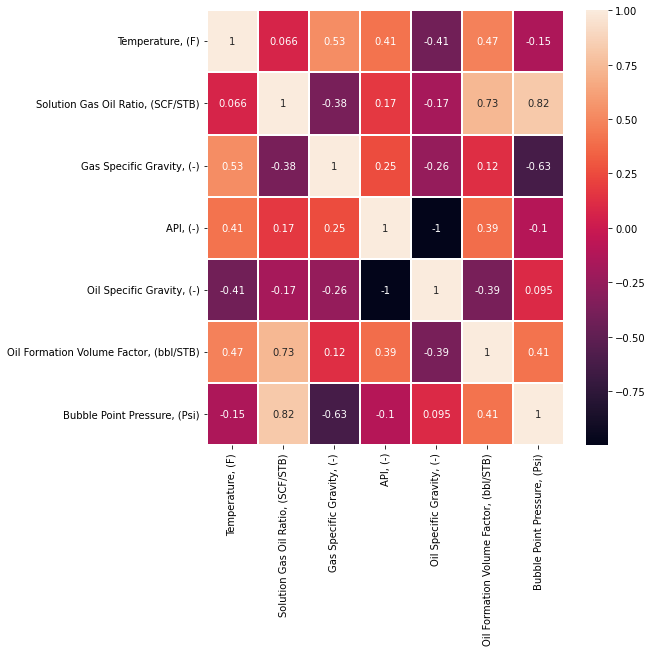

In [61]:
#let’s plot the Pearson correlation coefficient heat map as follows. 
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True,linewidths=2)

# API and OIL SPECIFIC GRAVITY are negtively correlated we will omit the Oil Specific gravity 

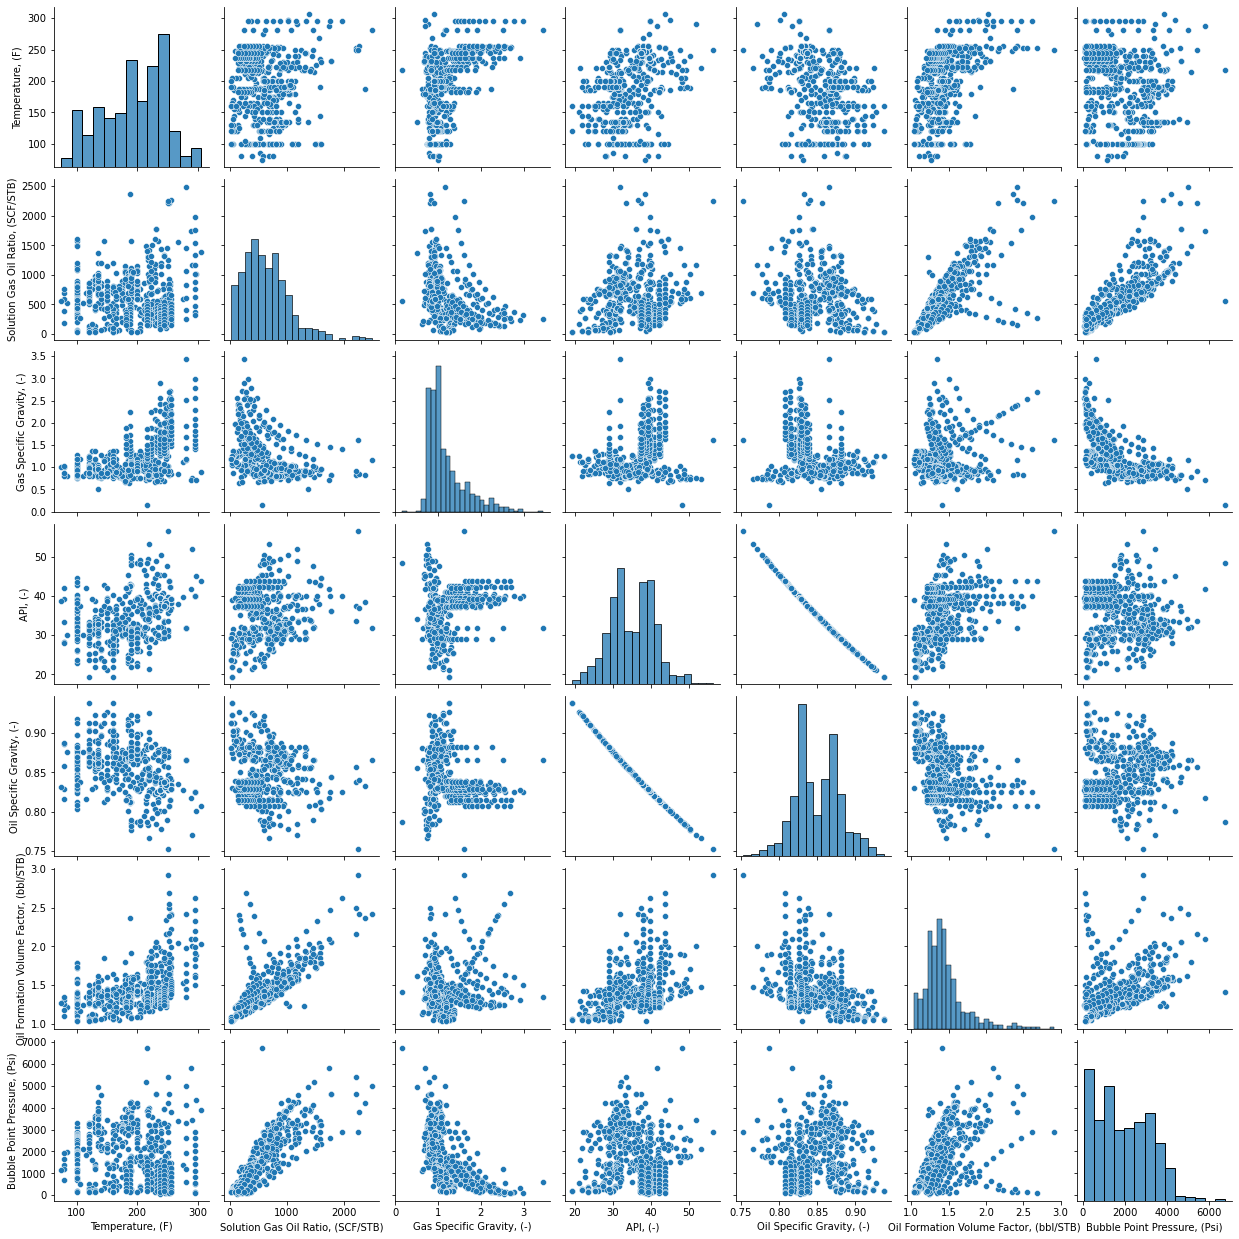

In [62]:
# Create the default pairplot
sns.pairplot(df)

In [63]:
#to get the pairwise correlation between Bubble Point Pressure and other variables
df.corrwith(df['Bubble Point Pressure, (Psi)'])

Temperature, (F)                         -0.145276
Solution Gas Oil Ratio, (SCF/STB)         0.819122
Gas Specific Gravity, (-)                -0.626800
API, (-)                                 -0.101328
Oil Specific Gravity, (-)                 0.094810
Oil Formation Volume Factor, (bbl/STB)    0.412120
Bubble Point Pressure, (Psi)              1.000000
dtype: float64

In [64]:
#to get the pairwise correlation between Oil Formation Volume Factor and other variables
df.corrwith(df['Oil Formation Volume Factor, (bbl/STB)'])

Temperature, (F)                          0.469576
Solution Gas Oil Ratio, (SCF/STB)         0.733133
Gas Specific Gravity, (-)                 0.120993
API, (-)                                  0.385372
Oil Specific Gravity, (-)                -0.386473
Oil Formation Volume Factor, (bbl/STB)    1.000000
Bubble Point Pressure, (Psi)              0.412120
dtype: float64

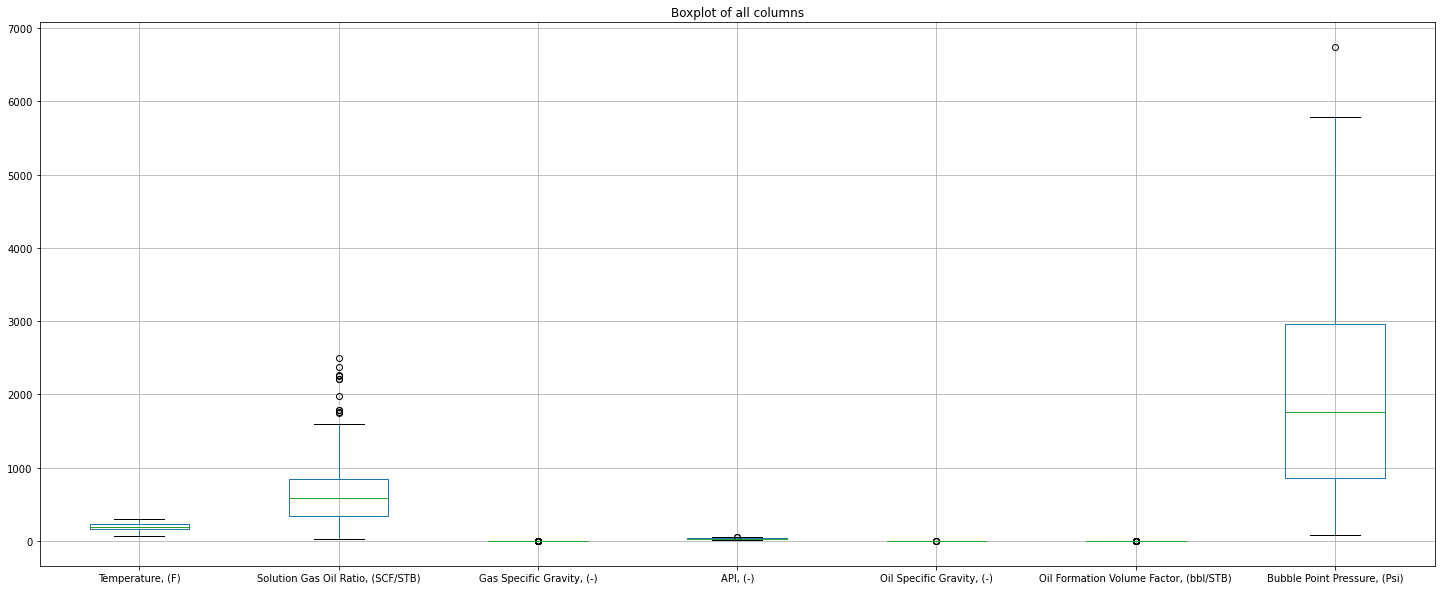

In [65]:
# Plot the boxplot for all columns in the DataFrame
plt.figure(figsize=(25, 10)) # Set the size of the plot
df.boxplot() # Plot the boxplot
plt.title('Boxplot of all columns') # Add a title to the plot
plt.show() # Show the plot

# Drop the Outliers

In [66]:
import numpy as np

# calculate lower and upper bounds using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# iterate over each column
for col in df.columns:
    # identify outliers in the column
    outliers = (df[col] < lower_bound[col]) | (df[col] > upper_bound[col])
    # drop rows with outliers
    df = df.loc[~outliers]


In [67]:
df.head()

,"Temperature, (F)","Solution Gas Oil Ratio, (SCF/STB)","Gas Specific Gravity, (-)","API, (-)","Oil Specific Gravity, (-)","Oil Formation Volume Factor, (bbl/STB)","Bubble Point Pressure, (Psi)"
Sample No.,,,,,,,
1,120,126.0,1.224,30.029680,0.876,1.102,350.0
2,150,160.0,1.265,21.142934,0.927,1.132,560.0
3,220,279.0,1.238,25.547725,0.901,1.264,998.0
4,165,410.0,1.088,27.488764,0.890,1.268,1332.0
5,130,469.0,0.970,34.579812,0.852,1.265,1428.0


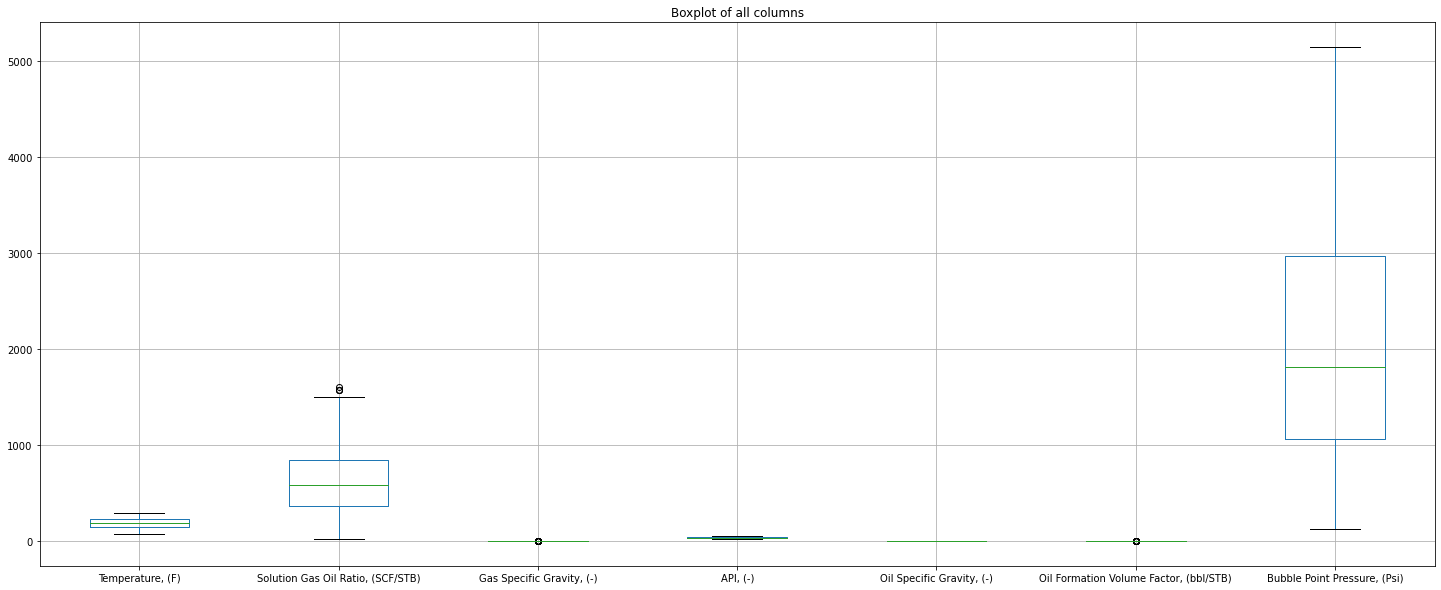

In [68]:
#check if the outliers is dropped or not 
# Plot the boxplot for all columns in the DataFrame
plt.figure(figsize=(25, 10)) # Set the size of the plot
df.boxplot() # Plot the boxplot
plt.title('Boxplot of all columns') # Add a title to the plot
plt.show() # Show the plot

In [69]:
df.shape

(502, 7)

In [70]:
df.columns

Index(['Temperature, (F)', 'Solution Gas Oil Ratio, (SCF/STB)',
       'Gas Specific Gravity, (-)', 'API, (-)', 'Oil Specific Gravity, (-)',
       'Oil Formation Volume Factor, (bbl/STB)',
       'Bubble Point Pressure, (Psi)'],
      dtype='object')

# Bubble Point Pressure Models

In [71]:
# define input and target variables
X = df[['Temperature, (F)', 'Solution Gas Oil Ratio, (SCF/STB)', 'Gas Specific Gravity, (-)','Oil Specific Gravity, (-)']]
y = df['Bubble Point Pressure, (Psi)']
y = np.array(y).reshape(-1, 1)



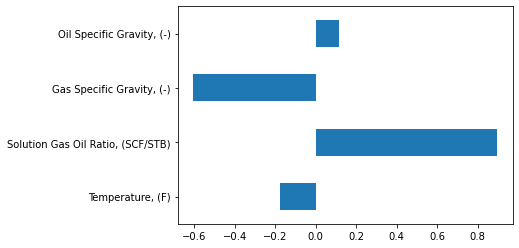

In [72]:
X_df = pd.DataFrame(X, columns=['Temperature, (F)', 'Solution Gas Oil Ratio, (SCF/STB)', 'Gas Specific Gravity, (-)', 'Oil Specific Gravity, (-)'])
X_df1 = df[['Temperature, (F)', 'Solution Gas Oil Ratio, (SCF/STB)', 'Gas Specific Gravity, (-)', 'Oil Specific Gravity, (-)','Bubble Point Pressure, (Psi)']]
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
datanorm=sc.fit_transform(X_df1)
stats.spearmanr(X_df1)
rho, pval=stats.spearmanr(datanorm)
corr=pd.Series(rho[:4,4], index=X_df.columns)
corr.plot(kind='barh')
plt.show()

In [73]:
from sklearn.preprocessing import StandardScaler

# create a StandardScaler object
Xscaler = StandardScaler()
yscaler = StandardScaler()

# fit the scaler to X and y and transform them
X = Xscaler.fit_transform(X)
y = yscaler.fit_transform(y)

In [74]:
# split the dat into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression 

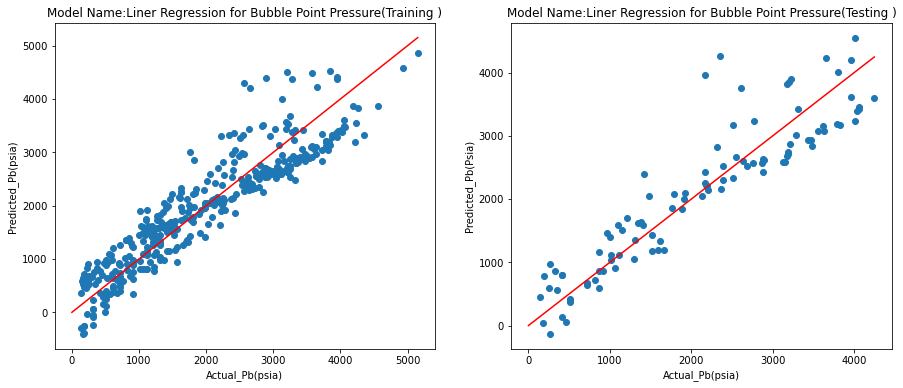

Training Data:
R2: 0.8485117096407293
RMSE: 448.3585313512293
Testing Data:
R2: 0.8363813265875578
RMSE: 484.38154182888405


In [75]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# create a LinearRegression object
lr = LinearRegression()

# fit the model to the training data
lr.fit(X_train, y_train)

# make predictions for the training and testing data
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# denormalize the predicted values
y_train_pred_denorm = yscaler.inverse_transform(y_train_pred)
y_test_pred_denorm = yscaler.inverse_transform(y_test_pred)
y_train_denorm = yscaler.inverse_transform(y_train)
y_test_denorm = yscaler.inverse_transform(y_test)

# calculate r2 for training and testing data
r2_trainlr = r2_score(y_train_denorm, y_train_pred_denorm)
r2_testlr = r2_score(y_test_denorm, y_test_pred_denorm)

# calculate rmse for training and testing data
rmse_trainlr = mean_squared_error(y_train_denorm, y_train_pred_denorm, squared=False)
rmse_testlr = mean_squared_error(y_test_denorm, y_test_pred_denorm, squared=False)


# Create a figure with one row and two columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot the training data with best-fit line
axs[0].scatter(y_train_denorm, y_train_pred_denorm)
axs[0].plot(np.linspace(0, np.max(y_train_denorm)), np.linspace(0, np.max(y_train_denorm)), 'r')
axs[0].set_xlabel('Actual_Pb(psia)')
axs[0].set_ylabel('Predicted_Pb(psia)')
axs[0].set_title('Model Name:Liner Regression for Bubble Point Pressure(Training )')

# Plot the testing data with best-fit line
axs[1].scatter(y_test_denorm, y_test_pred_denorm)
axs[1].plot(np.linspace(0, np.max(y_test_denorm)), np.linspace(0, np.max(y_test_denorm)), 'r')
axs[1].set_xlabel('Actual_Pb(psia)')
axs[1].set_ylabel('Predicted_Pb(Psia)')
axs[1].set_title('Model Name:Liner Regression for Bubble Point Pressure(Testing )')

# Display the figure
plt.show()
plt.tight_layout

# print the r2 and rmse values in a table
print('Training Data:')
print('R2:', r2_trainlr)
print('RMSE:', rmse_trainlr)
print('Testing Data:')
print('R2:', r2_testlr)
print('RMSE:', rmse_testlr)



# Random Forest 

Best hyperparameters: {'max_depth': None, 'n_estimators': 200}
Training Data (CV):
R2: 0.9335860007775161
RMSE: 0.2517851010567073
Testing Data (CV):
R2: 0.9089204730024303
RMSE: 0.3002669591065055


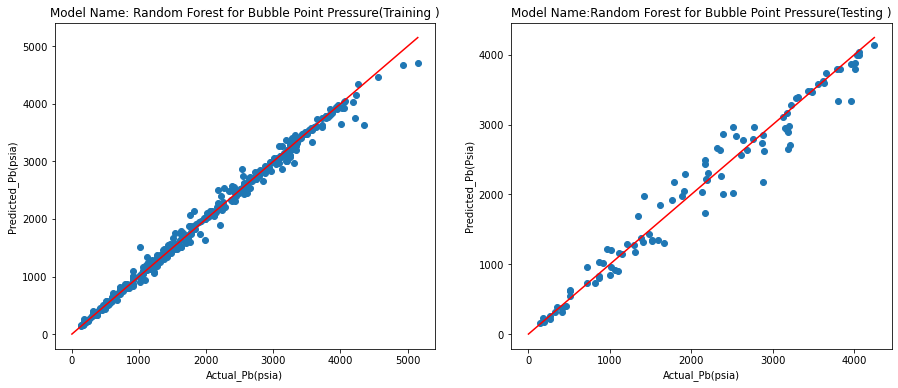

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

# Create a Random Forest Regressor object
rf = RandomForestRegressor()

# Define the hyperparameters to search over
params = {'n_estimators': [50, 100, 200],
          'max_depth': [None, 5, 10]}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
rf_best = grid_search.best_estimator_

# Make predictions for the training and testing data using the best estimator
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

# Denormalize the predicted values
y_train_pred_denorm = yscaler.inverse_transform(y_train_pred.reshape(-1, 1)).ravel()
y_test_pred_denorm = yscaler.inverse_transform(y_test_pred.reshape(-1, 1)).ravel()
y_train_denorm = yscaler.inverse_transform(y_train)
y_test_denorm = yscaler.inverse_transform(y_test)

# Calculate r2 for training and testing data using cross-validation
r2_train_cvrf = np.mean(cross_val_score(rf_best, X_train, y_train, cv=5, scoring='r2'))
r2_test_cvrf = np.mean(cross_val_score(rf_best, X_test, y_test, cv=5, scoring='r2'))

# Calculate RMSE for training and testing data using cross-validation
rmse_train_cvrf = np.mean(np.sqrt(-cross_val_score(rf_best, X_train, y_train, cv=5, scoring='neg_mean_squared_error')))
rmse_test_cvrf = np.mean(np.sqrt(-cross_val_score(rf_best, X_test, y_test, cv=5, scoring='neg_mean_squared_error')))

# Create a figure with one row and two columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot the training data with best-fit line
axs[0].scatter(y_train_denorm, y_train_pred_denorm)
axs[0].plot(np.linspace(0, np.max(y_train_denorm)), np.linspace(0, np.max(y_train_denorm)), 'r')
axs[0].set_xlabel('Actual_Pb(psia)')
axs[0].set_ylabel('Predicted_Pb(psia)')
axs[0].set_title('Model Name: Random Forest for Bubble Point Pressure(Training )')

# Plot the testing data with best-fit line
axs[1].scatter(y_test_denorm, y_test_pred_denorm)
axs[1].plot(np.linspace(0, np.max(y_test_denorm)), np.linspace(0, np.max(y_test_denorm)), 'r')
axs[1].set_xlabel('Actual_Pb(psia)')
axs[1].set_ylabel('Predicted_Pb(Psia)')
axs[1].set_title('Model Name:Random Forest for Bubble Point Pressure(Testing )')


# Print the best hyperparameters and performance metrics in a table
print('Best hyperparameters:', grid_search.best_params_)
print('Training Data (CV):')
print('R2:', r2_train_cvrf)
print('RMSE:', rmse_train_cvrf)
print('Testing Data (CV):')
print('R2:', r2_test_cvrf)
print('RMSE:', rmse_test_cvrf)



Text(0.5, 1.0, 'Feature Importance Ranking')

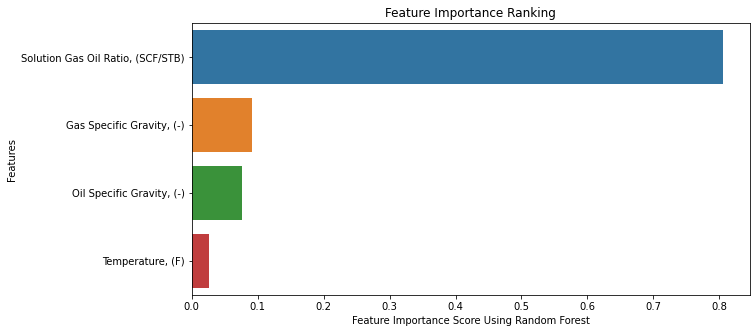

In [77]:
#feature importance of Random Forest 
feature_names =X_df.columns
plt.figure(figsize=(10,5))
feature_imp = pd.Series(rf_best.feature_importances_,index=feature_names).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score Using Random Forest')
plt.ylabel('Features')
plt.title("Feature Importance Ranking")

# Support Vector Machine 

Best hyperparameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Training Data (CV):
R2: 0.9517438837950504
RMSE: 0.2140835326704488
Testing Data (CV):
R2: 0.9312066090005182
RMSE: 0.2547457868677757


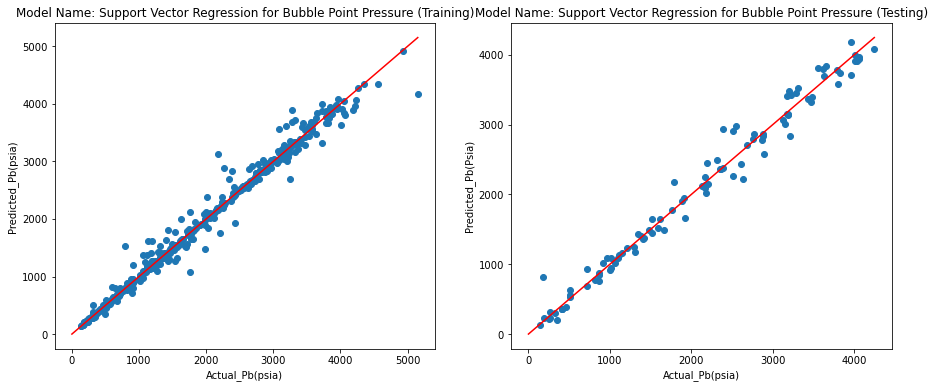

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

# Create a Support Vector Regressor object
svr = SVR()

# Define the hyperparameters to search over
params = {'C': [0.1, 1, 10],
          'kernel': ['linear', 'rbf', 'poly'],
          'epsilon': [0.01, 0.1, 1,10,100]}

# Create a GridSearchCV object
grid_search = GridSearchCV(svr, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
svr_best = grid_search.best_estimator_

# Make predictions for the training and testing data using the best estimator
y_train_pred = svr_best.predict(X_train)
y_test_pred = svr_best.predict(X_test)

# Denormalize the predicted values
y_train_pred_denorm = yscaler.inverse_transform(y_train_pred.reshape(-1, 1)).ravel()
y_test_pred_denorm = yscaler.inverse_transform(y_test_pred.reshape(-1, 1)).ravel()
y_train_denorm = yscaler.inverse_transform(y_train)
y_test_denorm = yscaler.inverse_transform(y_test)

# Calculate r2 for training and testing data using cross-validation
r2_train_cvsv = np.mean(cross_val_score(svr_best, X_train, y_train, cv=5, scoring='r2'))
r2_test_cvsv = np.mean(cross_val_score(svr_best, X_test, y_test, cv=5, scoring='r2'))

# Calculate RMSE for training and testing data using cross-validation
rmse_train_cvsv = np.mean(np.sqrt(-cross_val_score(svr_best, X_train, y_train, cv=5, scoring='neg_mean_squared_error')))
rmse_test_cvsv = np.mean(np.sqrt(-cross_val_score(svr_best, X_test, y_test, cv=5, scoring='neg_mean_squared_error')))

# Create a figure with one row and two columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot the training data with best-fit line
axs[0].scatter(y_train_denorm, y_train_pred_denorm)
axs[0].plot(np.linspace(0, np.max(y_train_denorm)), np.linspace(0, np.max(y_train_denorm)), 'r')
axs[0].set_xlabel('Actual_Pb(psia)')
axs[0].set_ylabel('Predicted_Pb(psia)')
axs[0].set_title('Model Name: Support Vector Regression for Bubble Point Pressure (Training)')

# Plot the testing data with best-fit line
axs[1].scatter(y_test_denorm, y_test_pred_denorm)
axs[1].plot(np.linspace(0, np.max(y_test_denorm)), np.linspace(0, np.max(y_test_denorm)), 'r')
axs[1].set_xlabel('Actual_Pb(psia)')
axs[1].set_ylabel('Predicted_Pb(Psia)')
axs[1].set_title('Model Name: Support Vector Regression for Bubble Point Pressure (Testing)')

# Print the best hyperparameters and performance metrics in a table
print('Best hyperparameters:', grid_search.best_params_)
print('Training Data (CV):')
print('R2:', r2_train_cvsv)
print('RMSE:', rmse_train_cvsv)
print('Testing Data (CV):')
print('R2:', r2_test_cvsv)
print('RMSE:', rmse_test_cvsv)

# XGB Model

Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Training Data (CV):
R2: 0.949397942787602
RMSE: 0.22074017882281255
Testing Data (CV):
R2: 0.9270468853692577
RMSE: 0.26816528121690164


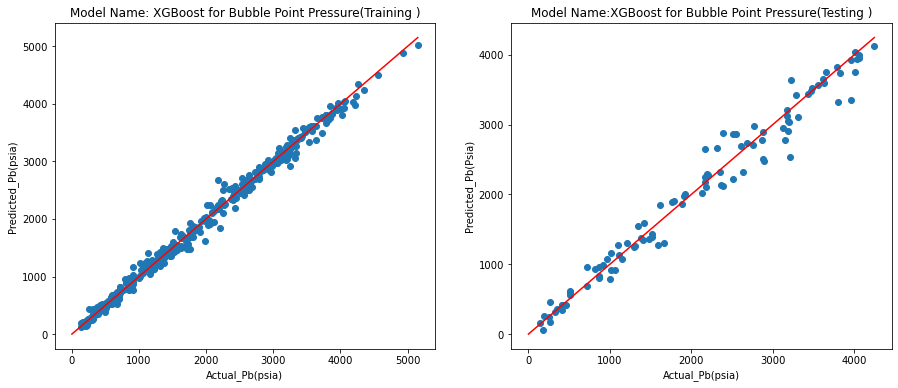

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

# Create an XGBoost Regressor object
xgb = XGBRegressor()

# Define the hyperparameters to search over
params = {'n_estimators': [50, 200, 500],
          'max_depth': [3,5, 10],
          'learning_rate': [0.1, 0.01],
          'subsample': [0.8, 1.0],'colsample_bytree': [0.8, 1.0],'n_estimators': [50, 100, 200]}

# Create a GridSearchCV object
grid_search = GridSearchCV(xgb, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
xgb_best = grid_search.best_estimator_

# Make predictions for the training and testing data using the best estimator
y_train_pred = xgb_best.predict(X_train)
y_test_pred = xgb_best.predict(X_test)

# Denormalize the predicted values
y_train_pred_denorm = yscaler.inverse_transform(y_train_pred.reshape(-1, 1)).ravel()
y_test_pred_denorm = yscaler.inverse_transform(y_test_pred.reshape(-1, 1)).ravel()
y_train_denorm = yscaler.inverse_transform(y_train)
y_test_denorm = yscaler.inverse_transform(y_test)

# Calculate r2 for training and testing data using cross-validation
r2_train_cvxg = np.mean(cross_val_score(xgb_best, X_train, y_train, cv=5, scoring='r2'))
r2_test_cvxg = np.mean(cross_val_score(xgb_best, X_test, y_test, cv=5, scoring='r2'))

# Calculate RMSE for training and testing data using cross-validation
rmse_train_cvxg = np.mean(np.sqrt(-cross_val_score(xgb_best, X_train, y_train, cv=5, scoring='neg_mean_squared_error')))
rmse_test_cvxg = np.mean(np.sqrt(-cross_val_score(xgb_best, X_test, y_test, cv=5, scoring='neg_mean_squared_error')))

# Create a figure with one row and two columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot the training data with best-fit line
axs[0].scatter(y_train_denorm, y_train_pred_denorm)
axs[0].plot(np.linspace(0, np.max(y_train_denorm)), np.linspace(0, np.max(y_train_denorm)), 'r')
axs[0].set_xlabel('Actual_Pb(psia)')
axs[0].set_ylabel('Predicted_Pb(psia)')
axs[0].set_title('Model Name: XGBoost for Bubble Point Pressure(Training )')

# Plot the testing data with best-fit line
axs[1].scatter(y_test_denorm, y_test_pred_denorm)
axs[1].plot(np.linspace(0, np.max(y_test_denorm)), np.linspace(0, np.max(y_test_denorm)), 'r')
axs[1].set_xlabel('Actual_Pb(psia)')
axs[1].set_ylabel('Predicted_Pb(Psia)')
axs[1].set_title('Model Name:XGBoost for Bubble Point Pressure(Testing )')

# Print the best hyperparameters and performance metrics in a table
print('Best hyperparameters:', grid_search.best_params_)
print('Training Data (CV):')
print('R2:', r2_train_cvxg)
print('RMSE:', rmse_train_cvxg)
print('Testing Data (CV):')
print('R2:', r2_test_cvxg)
print('RMSE:', rmse_test_cvxg)


# ANN Model

In [80]:
# pip install keras
# pip install tensorflow 

In [81]:
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Define the function that creates the model
def create_model(num_layers, num_neurons, activation='relu'):
    model = Sequential()
    model.add(Dense(num_neurons, activation=activation, input_dim=X_train.shape[1]))
    for i in range(num_layers-1):
        model.add(Dense(num_neurons, activation=activation))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Define the hyperparameters to search over
param_grid = {
    'num_layers': [1, 2, 3,5,10,20],
    'num_neurons': [8, 16, 32, 64],
    'epochs': [50, 100, 200]
}

# Create the Keras model
model = KerasRegressor(build_fn=create_model, verbose=0)

# Perform a grid search over the hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the best hyperparameters of the model
print(f'Best hyperparameters: {grid_result.best_params_}')

# Evaluate the best model on the test set
best_model = grid.best_estimator_
test_loss = best_model.model.evaluate(X_test, y_test)

print(f'Test loss: {test_loss}')


Best hyperparameters: {'epochs': 200, 'num_layers': 2, 'num_neurons': 64}
4/4 [==============================] - 0s 1ms/step - loss: 0.0219
Test loss: 0.0218787994235754


Best hyperparameters: {'epochs': 200, 'num_layers': 2, 'num_neurons': 64}
Training Data (CV):
R2: 0.9522509775961117
RMSE: 0.21347900091853456
Testing Data (CV):
R2: 0.9511649892299724
RMSE: 0.21211340606689344


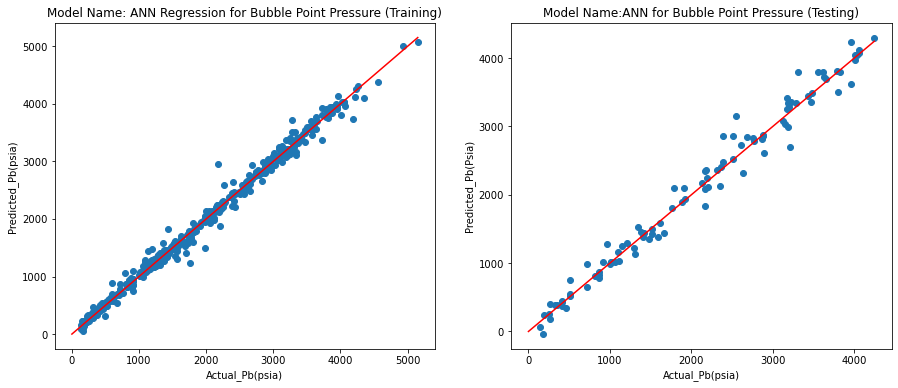

In [82]:
# Make predictions for the training and testing data using the best estimator
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Denormalize the predicted values
y_train_pred_denorm = yscaler.inverse_transform(y_train_pred.reshape(-1, 1)).ravel()
y_test_pred_denorm = yscaler.inverse_transform(y_test_pred.reshape(-1, 1)).ravel()
y_train_denorm = yscaler.inverse_transform(y_train)
y_test_denorm = yscaler.inverse_transform(y_test)

# Calculate r2 for training and testing data using cross-validation
r2_train_cvnn = np.mean(cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2'))
r2_test_cvnn = np.mean(cross_val_score(best_model, X_test, y_test, cv=5, scoring='r2'))

# Calculate RMSE for training and testing data using cross-validation
rmse_train_cvnn = np.mean(np.sqrt(-cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')))
rmse_test_cvnn = np.mean(np.sqrt(-cross_val_score(best_model, X_test, y_test, cv=5, scoring='neg_mean_squared_error')))


# Create a figure with one row and two columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot the training data with best-fit line
axs[0].scatter(y_train_denorm, y_train_pred_denorm)
axs[0].plot(np.linspace(0, np.max(y_train_denorm)), np.linspace(0, np.max(y_train_denorm)), 'r')
axs[0].set_xlabel('Actual_Pb(psia)')
axs[0].set_ylabel('Predicted_Pb(psia)')
axs[0].set_title('Model Name: ANN Regression for Bubble Point Pressure (Training)')

# Plot the testing data with best-fit line
axs[1].scatter(y_test_denorm, y_test_pred_denorm)
axs[1].plot(np.linspace(0, np.max(y_test_denorm)), np.linspace(0, np.max(y_test_denorm)), 'r')
axs[1].set_xlabel('Actual_Pb(psia)')
axs[1].set_ylabel('Predicted_Pb(Psia)')
axs[1].set_title('Model Name:ANN for Bubble Point Pressure (Testing)')
# Print the best hyperparameters and performance metrics in a table
print('Best hyperparameters:', grid_result.best_params_)
print('Training Data (CV):')
print('R2:', r2_train_cvnn)
print('RMSE:', rmse_train_cvnn)
print('Testing Data (CV):')
print('R2:', r2_test_cvnn)
print('RMSE:', rmse_test_cvnn)

# Comparison Between the Machine Learning Models

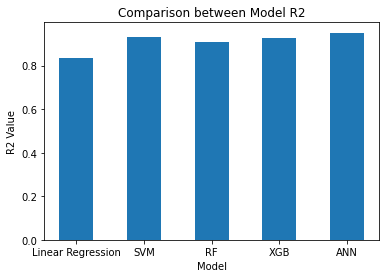

In [95]:
import matplotlib.pyplot as plt

# x-axis labels
models = ['Linear Regression', 'SVM', 'RF', 'XGB', 'ANN']

# y-axis values
R2_values = [r2_testlr, r2_test_cvsv, r2_test_cvrf, r2_test_cvxg, r2_test_cvnn]

# create bar plot with some extra space between the bars

plt.bar(models, R2_values, width=0.5)

# set x-axis label
plt.xlabel('Model')

# set y-axis label
plt.ylabel('R2 Value')

# set plot title
plt.title('Comparison between Model R2')



# show the plot
plt.show()


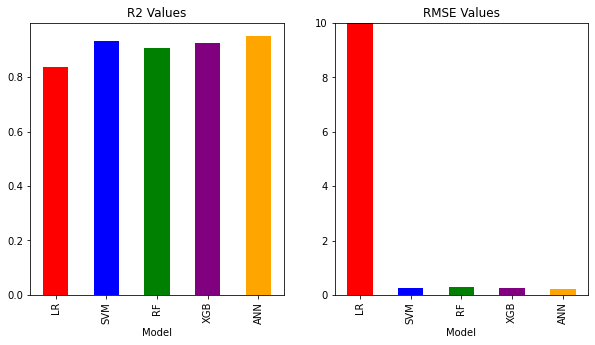

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# x-axis labels
models = ['LR', 'SVM', 'RF', 'XGB', 'ANN']

# y-axis values
R2_values = [r2_testlr, r2_test_cvsv, r2_test_cvrf, r2_test_cvxg, r2_test_cvnn]
rmse_values = [rmse_testlr, rmse_test_cvsv, rmse_test_cvrf, rmse_test_cvxg, rmse_test_cvnn]

# create two DataFrames with the models and R2_values and rmse_values
dfr2 = pd.DataFrame({'Model': models, 'R2 Value': R2_values})
dfrmse = pd.DataFrame({'Model': models, 'RMSE Value': rmse_values})

# merge the two DataFrames based on the 'Model' column
dfn = pd.merge(dfr2, dfrmse, on='Model')

# set the index to 'Model'
dfn.set_index('Model', inplace=True)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
dfn['R2 Value'].plot.bar(ax=ax[0], color=['red', 'blue', 'green', 'purple', 'orange'])
ax[0].set_title('R2 Values')
dfn['RMSE Value'].plot.bar(ax=ax[1], color=['red', 'blue', 'green', 'purple', 'orange'])
ax[1].set_title('RMSE Values')
ax[1].set_ylim(0, 10)
plt.show()


In [84]:
# x-axis labels
models = ['Linear Regression', 'SVM', 'RF', 'XGB', 'ANN']

# y-axis values
R2_values = [r2_testlr, r2_test_cvsv, r2_test_cvrf, r2_test_cvxg, r2_test_cvnn]
rmse_values = [rmse_testlr, rmse_test_cvsv, rmse_test_cvrf, rmse_test_cvxg, rmse_test_cvnn]

# create two DataFrames with the models and R2_values and rmse_values
dfr2 = pd.DataFrame({'Model': models, 'R2 Value': R2_values})
dfrmse = pd.DataFrame({'Model': models, 'RMSE Value': rmse_values})

# merge the two DataFrames based on the 'Model' column
dfn = pd.merge(dfr2, dfrmse, on='Model')
dfn



,Model,R2 Value,RMSE Value
0,Linear Regression,0.836381,484.381542
1,SVM,0.931207,0.254746
2,RF,0.908920,0.300267
3,XGB,0.927047,0.268165
4,ANN,0.951165,0.212113


# Correlations Calculation for Bubble Point Pressure

In [85]:
import math
import numpy as np

# define the functions for each correlation
def Glaso(T, API, Rs, SG_gas):
    a=0.816
    b=0.172
    c=-0.989
    pb1=((Rs/SG_gas)**a)*(T**b)*(API)**c
    logpb=1.7669+1.7447*np.log10(pb1)-0.30218*((np.log10(pb1)))**2  
    P=10**logpb
    return P

def standing(T, API,Rs,SG_gas):
    T=T+460
    a= float(0.00091 * (T - 460) - 0.0125 * API)
    P = 18.2*(((Rs/SG_gas)**0.83)*(10**float(a))-1.4)
    return P

def Marhouns(T, API,Rs, SG_gas,SGO):
    a=5.38088e-3
    b=0.715082
    c=-1.87784
    e=1.32657
    d=3.1437
    T=T+460
    P=a*(Rs**b)*(SG_gas**c)*(SGO**d)*(T**e)
    return P
df['Bubble Point Pressure (Standing)'] = df.apply(lambda row: standing(row['Temperature, (F)'], row['API, (-)'], row['Solution Gas Oil Ratio, (SCF/STB)'], row['Gas Specific Gravity, (-)']), axis=1)
df['Bubble Point Pressure (Glaso)'] = df.apply(lambda row: Glaso(row['Temperature, (F)'], row['API, (-)'], row['Solution Gas Oil Ratio, (SCF/STB)'], row['Gas Specific Gravity, (-)']), axis=1)
df['Bubble Point Pressure (Marhouns)'] = df.apply(lambda row: Marhouns(row['Temperature, (F)'], row['API, (-)'], row['Solution Gas Oil Ratio, (SCF/STB)'], row['Gas Specific Gravity, (-)'],row['Oil Specific Gravity, (-)']), axis=1)

df.head()


,"Temperature, (F)","Solution Gas Oil Ratio, (SCF/STB)","Gas Specific Gravity, (-)","API, (-)","Oil Specific Gravity, (-)","Oil Formation Volume Factor, (bbl/STB)","Bubble Point Pressure, (Psi)",Bubble Point Pressure (Standing),Bubble Point Pressure (Glaso),Bubble Point Pressure (Marhouns)
Sample No.,,,,,,,,,,
1,120,126.0,1.224,30.029680,0.876,1.102,350.0,436.208821,415.841545,357.340180
2,150,160.0,1.265,21.142934,0.927,1.132,560.0,727.822068,876.171523,508.995238
3,220,279.0,1.238,25.547725,0.901,1.264,998.0,1215.652598,1346.704301,833.174539
4,165,410.0,1.088,27.488764,0.890,1.268,1332.0,1577.102719,1892.348647,1202.964265
5,130,469.0,0.970,34.579812,0.852,1.265,1428.0,1467.921748,1761.150497,1326.947068


In [86]:
dfval=df

import numpy as np

# calculate lower and upper bounds using IQR
Q1 = dfval.quantile(0.25)
Q3 = dfval.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# iterate over each column
for col in dfval.columns:
    # identify outliers in the column
    outliers = (dfval[col] < lower_bound[col]) | (dfval[col] > upper_bound[col])
    # drop rows with outliers
    dfval = dfval.loc[~outliers]


In [87]:
#Validation_data
# define input and target variables
X = dfval[['Temperature, (F)', 'Solution Gas Oil Ratio, (SCF/STB)', 'Gas Specific Gravity, (-)','Oil Specific Gravity, (-)']]
y = dfval['Bubble Point Pressure, (Psi)']
y = np.array(y).reshape(-1, 1)
from sklearn.preprocessing import StandardScaler

# create a StandardScaler object
Xscaler = StandardScaler()
yscaler = StandardScaler()

# fit the scaler to X and y and transform them
X = Xscaler.fit_transform(X)
y = yscaler.fit_transform(y)

y_test_pred = best_model.predict(X)
y_test_denorm = yscaler.inverse_transform(y)
y_test_pred_denorm = yscaler.inverse_transform(y_test_pred.reshape(-1, 1)).ravel()
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error


 

R2: 0.9837965984339438
RMSE: 143.6269670981005


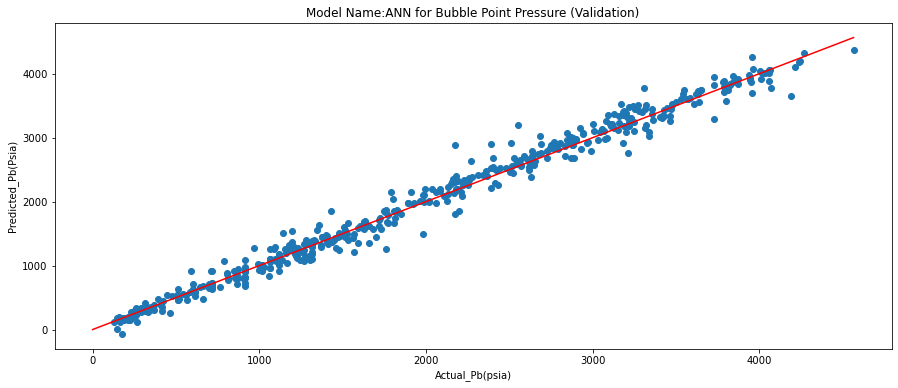

In [88]:
# Create a figure with one row and two columns
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

# Plot the testing data with best-fit line
axs.scatter(y_test_denorm, y_test_pred_denorm)
axs.plot(np.linspace(0, np.max(y_test_denorm)), np.linspace(0, np.max(y_test_denorm)), 'r')
axs.set_xlabel('Actual_Pb(psia)')
axs.set_ylabel('Predicted_Pb(Psia)')
axs.set_title('Model Name:ANN for Bubble Point Pressure (Validation)')
# Assuming y_test_denorm and y_test_pred_denorm are NumPy arrays
r2 = r2_score(y_test_denorm, y_test_pred_denorm)
rmse = np.sqrt(mean_squared_error(y_test_denorm, y_test_pred_denorm))

print("R2:", r2)
print("RMSE:", rmse)


R2: 0.8390880462835174
RMSE: 452.613023424516


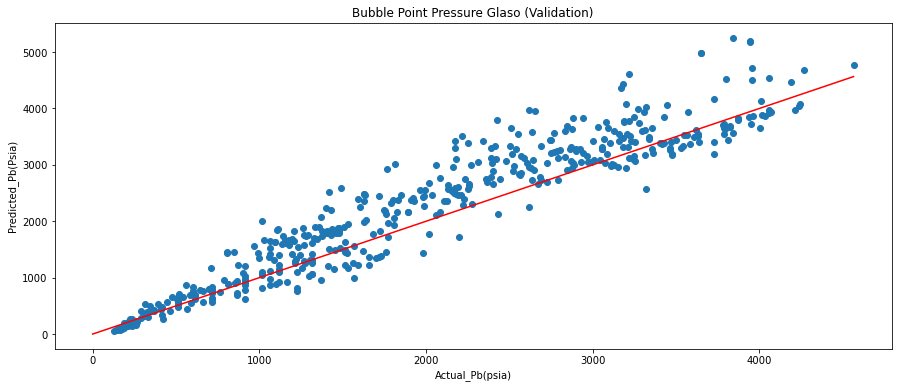

In [89]:
# Create a figure with one row and two columns
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
y_glaso=dfval['Bubble Point Pressure (Glaso)']
# Plot the testing data with best-fit line
axs.scatter(y_test_denorm, y_glaso)
axs.plot(np.linspace(0, np.max(y_test_denorm)), np.linspace(0, np.max(y_test_denorm)), 'r')
axs.set_xlabel('Actual_Pb(psia)')
axs.set_ylabel('Predicted_Pb(Psia)')
axs.set_title('Bubble Point Pressure Glaso (Validation)')
# Assuming y_test_denorm and y_test_pred_denorm are NumPy arrays
r2 = r2_score(y_test_denorm, y_glaso)
rmse = np.sqrt(mean_squared_error(y_test_denorm, y_glaso))

print("R2:", r2)
print("RMSE:", rmse)

R2: 0.8390880462835174
RMSE: 452.613023424516


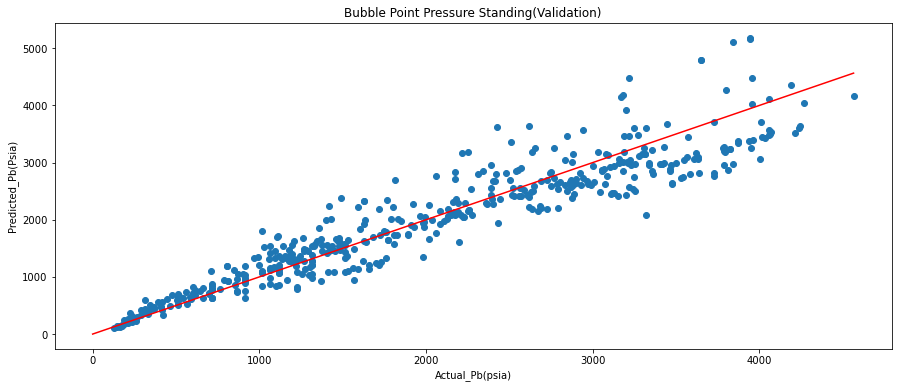

In [90]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
y_st=dfval['Bubble Point Pressure (Standing)']
# Plot the testing data with best-fit line
axs.scatter(y_test_denorm, y_st)
axs.plot(np.linspace(0, np.max(y_test_denorm)), np.linspace(0, np.max(y_test_denorm)), 'r')
axs.set_xlabel('Actual_Pb(psia)')
axs.set_ylabel('Predicted_Pb(Psia)')
axs.set_title('Bubble Point Pressure Standing(Validation)')
# Assuming y_test_denorm and y_test_pred_denorm are NumPy arrays
r2 = r2_score(y_test_denorm, y_glaso)
rmse = np.sqrt(mean_squared_error(y_test_denorm, y_glaso))

print("R2:", r2)
print("RMSE:", rmse)

R2: 0.8390880462835174
RMSE: 452.613023424516


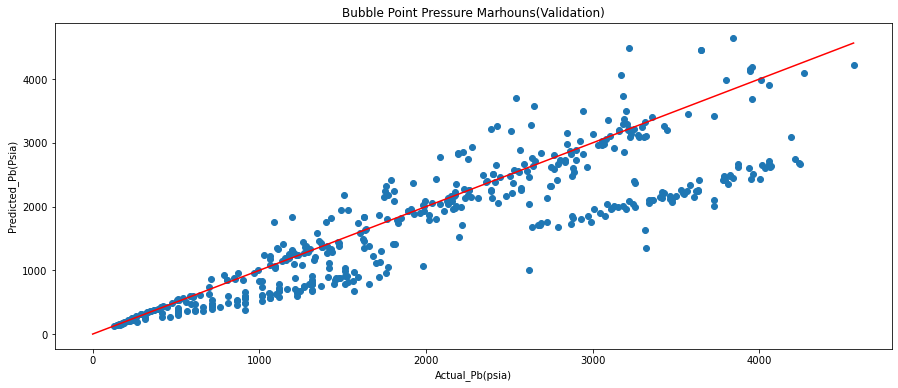

In [91]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
y_st=dfval['Bubble Point Pressure (Marhouns)']
# Plot the testing data with best-fit line
axs.scatter(y_test_denorm, y_st)
axs.plot(np.linspace(0, np.max(y_test_denorm)), np.linspace(0, np.max(y_test_denorm)), 'r')
axs.set_xlabel('Actual_Pb(psia)')
axs.set_ylabel('Predicted_Pb(Psia)')
axs.set_title('Bubble Point Pressure Marhouns(Validation)')
# Assuming y_test_denorm and y_test_pred_denorm are NumPy arrays
r2 = r2_score(y_test_denorm, y_glaso)
rmse = np.sqrt(mean_squared_error(y_test_denorm, y_glaso))

print("R2:", r2)
print("RMSE:", rmse)

Text(0.5, 1.0, 'Bubble Point Pressure Standing Mahrouns (Validation)\nR2: 0.70')

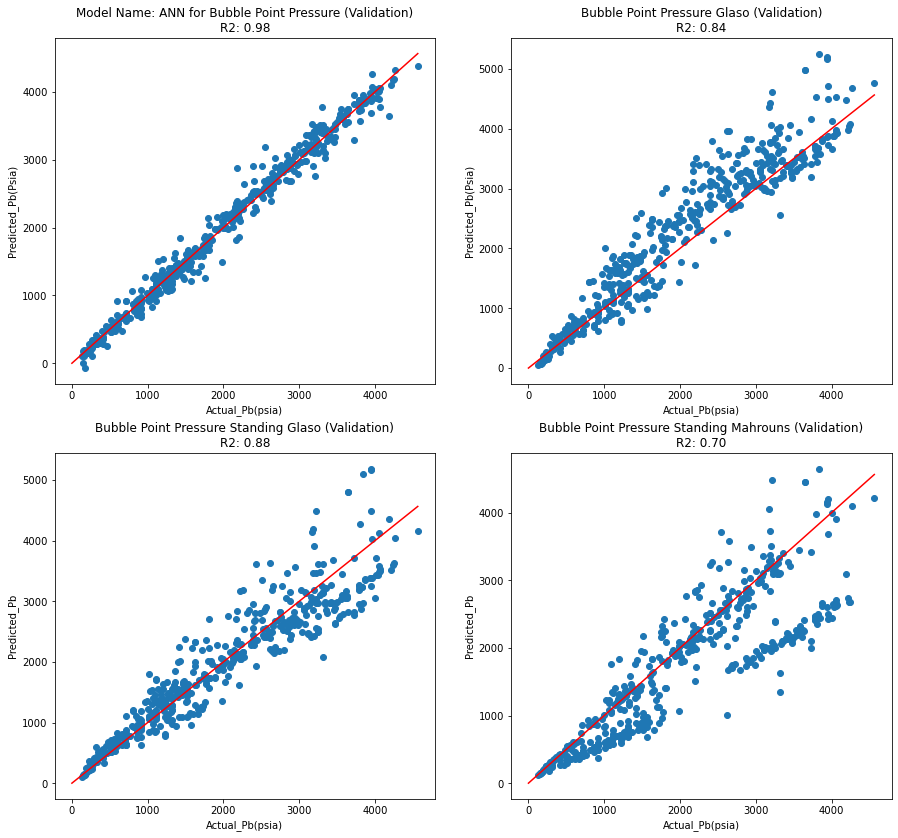

In [92]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error



# Calculate R2 and RMSE for ANN model
r2_ann = r2_score(y_test_denorm, y_test_pred_denorm)
rmse_ann = np.sqrt(mean_squared_error(y_test_denorm, y_test_pred_denorm))

# Calculate R2 and RMSE for Glaso model
y_glaso = dfval['Bubble Point Pressure (Glaso)']
r2_glaso = r2_score(y_test_denorm, y_glaso)
rmse_glaso = np.sqrt(mean_squared_error(y_test_denorm, y_glaso))

# Calculate R2 and RMSE for Standing model
y_standing = dfval['Bubble Point Pressure (Standing)']
r2_standing = r2_score(y_test_denorm, y_standing)
rmse_standing = np.sqrt(mean_squared_error(y_test_denorm, y_standing))

# Calculate R2 and RMSE for Marhouns model
y_marhouns = dfval['Bubble Point Pressure (Marhouns)']
r2_marhouns = r2_score(y_test_denorm, y_marhouns)
rmse_marhouns = np.sqrt(mean_squared_error(y_test_denorm, y_marhouns))

# Create a figure with two rows and two columns
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 14))

# Plot the testing data with best-fit line and annotate R2 value for ANN model
axs[0, 0].scatter(y_test_denorm, y_test_pred_denorm)
axs[0, 0].plot(np.linspace(0, np.max(y_test_denorm)), np.linspace(0, np.max(y_test_denorm)), 'r')
axs[0, 0].set_xlabel('Actual_Pb(psia)')
axs[0, 0].set_ylabel('Predicted_Pb(Psia)')
axs[0, 0].set_title(f'Model Name: ANN for Bubble Point Pressure (Validation)\nR2: {r2_ann:.2f}')
    
# Plot the testing data with best-fit line and annotate R2 value for Glaso model
axs[0, 1].scatter(y_test_denorm, y_glaso)
axs[0, 1].plot(np.linspace(0, np.max(y_test_denorm)), np.linspace(0, np.max(y_test_denorm)), 'r')
axs[0, 1].set_xlabel('Actual_Pb(psia)')
axs[0, 1].set_ylabel('Predicted_Pb(Psia)')
axs[0, 1].set_title(f'Bubble Point Pressure Glaso (Validation)\nR2: {r2_glaso:.2f}')

# Plot the testing data with best-fit line and annotate R2 value for Standing model
axs[1, 0].scatter(y_test_denorm, y_standing)
axs[1, 0].plot(np.linspace(0, np.max(y_test_denorm)), np.linspace(0, np.max(y_test_denorm)), 'r')
axs[1, 0].set_xlabel('Actual_Pb(psia)')
axs[1, 0].set_ylabel('Predicted_Pb')
axs[1, 0].set_title(f'Bubble Point Pressure Standing Glaso (Validation)\nR2: {r2_standing:.2f}')

# Plot the testing data with best-fit line and annotate R2 value for Standing model
axs[1, 1].scatter(y_test_denorm, y_marhouns)
axs[1, 1].plot(np.linspace(0, np.max(y_test_denorm)), np.linspace(0, np.max(y_test_denorm)), 'r')
axs[1, 1].set_xlabel('Actual_Pb(psia)')
axs[1, 1].set_ylabel('Predicted_Pb')
axs[1, 1].set_title(f'Bubble Point Pressure Standing Mahrouns (Validation)\nR2: {r2_marhouns:.2f}')

In [93]:
# Create a dictionary with the data
data = {'Model': ['ANN', 'Glaso', 'Standing', 'Marhouns'],
        'R2 Score': [r2_ann, r2_glaso, r2_standing, r2_marhouns],
        'RMSE': [rmse_ann, rmse_glaso, rmse_standing, rmse_marhouns]}

# Create a dataframe from the dictionary
df = pd.DataFrame(data)
df


,Model,R2 Score,RMSE
0,ANN,0.983797,143.626967
1,Glaso,0.839088,452.613023
2,Standing,0.882530,386.719482
3,Marhouns,0.696674,621.423204


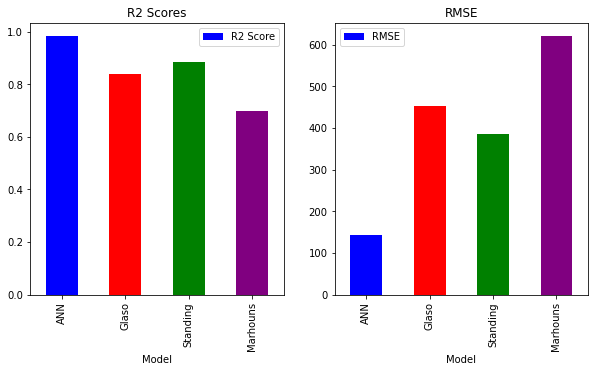

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dictionary with the data
data = {'Model': ['ANN', 'Glaso', 'Standing', 'Marhouns'],
        'R2 Score': [r2_ann, r2_glaso, r2_standing, r2_marhouns],
        'RMSE': [rmse_ann, rmse_glaso, rmse_standing, rmse_marhouns]}

# Create a dataframe from the dictionary
df = pd.DataFrame(data)

# Define the colors for each model
colors = {'ANN': 'blue', 'Glaso': 'red', 'Standing': 'green', 'Marhouns': 'purple'}

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the R2 scores in the first subplot
df.plot(x='Model', y='R2 Score', kind='bar', ax=ax1, color=df['Model'].map(colors))
ax1.set_title('R2 Scores')

# Plot the RMSE in the second subplot
df.plot(x='Model', y='RMSE', kind='bar', ax=ax2, color=df['Model'].map(colors))
ax2.set_title('RMSE')

# Add a legend to the first subplot
ax1.legend(loc='upper right')

# Show the plot
plt.show()
